# PG AI - Natural Language Processing and Speech Recognition
# Project: Identifying Top Product Features from User Reviews

DESCRIPTION

Analyze the reviews of a product on Amazon to identify the features of the product that customers are talking about the most. Use POS tagging and extracting the right parts of speech to analyze.

#### Problem Statement: 

Amazon Tap is a product made by Amazon. It is a portable Bluetooth and Wi-Fi-enabled speaker that gives you rich, full-range sound. Customers can use Alexa Voice Service that performs the role of a virtual assistant.<br>
Amazon is planning to launch a new version of Tap but, need to understand what features of the products are important for the customers. Amazon wants to analyze the reviews gathered on the product so far, to assess which of the product’s features are most talked about  by the customers.<br>

#### Domain: Amazon reviews

#### Analysis to be done: Identification and plotting of the top product features mentioned in the reviews. 

#### Content: 

Dataset: ‘Tap Reviews.csv’
Columns:
asins: Amazon identifier for the product
name: The name of the product
reviews.numHelpful: number of votes saying this review was helpful
reviews.rating: The rating for the product given in the review
reviews.text: The main text of the review
reviews.title: The title of the review 

#### Steps to perform:

The product features are the keywords in the sentence. These keywords occur as nouns in the reviews. The reviews have to be broken into sentences, then words, then POS tagged, and then the target POS tags need to be analyzed. The top 15 features need to be plotted for a business presentation. You’ll also need to perform extensive cleanup.<br>

#### Tasks:

1. Using Pandas, read in the .csv file. Take a look at the top few reviews.
2. The table has many columns. We’re interested in ‘review.text’. Get the review text into a list, for easy text cleanup and manipulation.
3. We can see that each review has multiple sentences.  For any parts of speech tagger to work effectively, we need to separate the sentences.
    1. Use sent_tokenize to separate the sentences.
    2. Then, use word_tokenize to tokenize each resulting sentence into constituent words. Create a new list that contains all the tokenized sentences.
4. Perform parts-of-speech tagging on each sentence using the NLTK POS tagger.
5. We have tagged all the sentences. We are interested in the keywords which are typically nouns. Extract all the nouns from all the sentences into one large list.
    1. The POS tags you need to get are NN, NNP, NNS, and NNPS.
6. Perform cleanup on the data: 
    1. Normalize the casings 
    2. Remove regular stop words and punctuation
    3. Remove contextual stop words
7. Use counter to get the top 15 keywords from the reviews.
9. Plot the top 15 on a horizontal bar chart.

By Edson Teixeira<br>
teixeiraedson252@gmail.com <br>
December 30th 2021

In [1]:
import numpy as np, pandas as pd
import re, random, os

import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

### Reading in the reviews data file

In [2]:
inp0 = pd.read_csv('Tap Reviews.csv')
inp0.head()

,asins,name,reviews.numHelpful,reviews.rating,reviews.text,reviews.title
0,B01BH83OOM,Amazon Tap - Alexa-Enabled Portable Bluetooth ...,806,5,IMPORTANT UPDATE (3/8/17): As you read my orig...,"The Echo's Little Sister Is AMAZING!! 3,"
1,B01BH83OOM,Amazon Tap - Alexa-Enabled Portable Bluetooth ...,426,5,It was just a few weeks ago that I was bemoani...,Tap Alexa on the go!
2,B01BH83OOM,Amazon Tap - Alexa-Enabled Portable Bluetooth ...,295,5,The Amazon Tap is a portable Bluetooth speaker...,Amazon Tap Review - Best Bluetooth Speaker in ...
3,B01BH83OOM,Amazon Tap - Alexa-Enabled Portable Bluetooth ...,0,5,Look at this product as a portable speaker fir...,Great for what it does
4,B01BH83OOM,Amazon Tap - Alexa-Enabled Portable Bluetooth ...,3,5,This Amazon tap is not only a great Bluetooth ...,"Awesome, smart little portable speaker"


In [3]:
inp0.columns

Index(['asins', 'name', 'reviews.numHelpful', 'reviews.rating', 'reviews.text',
       'reviews.title'],
      dtype='object')

#### This has a lot of extra columns - we are concerned only with the field reviews.text.  
#### Store the review text into a list for easy manipulation.

In [4]:
reviews0 = inp0['reviews.text'].values

In [5]:
len(reviews0)

542

In [6]:
type(reviews0)

numpy.ndarray

In [7]:
reviews0[3]

'Look at this product as a portable speaker first and an Echo replacement second. The big reason to buy this over standard Bluetooth speakers is this has WiFi streaming enabled. When you are at home you can stream music with ease to it. Voice recognition is top notch and it really shines when using it with other smart home accessories. The only problem is having to tap the microphone button for it to listen to your voice. If you want bigger sound and always listening features, spend the extra money on the Amazon Echo.'

#### We can see that each review has multiple sentences.  
#### For any Part of Speech tagger to work effectively, we need to separate the sentences.
- We'll need to use sent_tokenize to separate the sentences, then use word_tokenize to tokenize each resulting sentence into constituent words
- Let's first do this for a single sentence, and then make a function

In [8]:
from nltk.tokenize import word_tokenize, sent_tokenize

In [9]:
sent_tokenize(reviews0[3])

['Look at this product as a portable speaker first and an Echo replacement second.',
 'The big reason to buy this over standard Bluetooth speakers is this has WiFi streaming enabled.',
 'When you are at home you can stream music with ease to it.',
 'Voice recognition is top notch and it really shines when using it with other smart home accessories.',
 'The only problem is having to tap the microphone button for it to listen to your voice.',
 'If you want bigger sound and always listening features, spend the extra money on the Amazon Echo.']

Doing this for all the reviews

In [10]:
review_sents = [sent_tokenize(sent) for sent in reviews0]

In [11]:
len(review_sents)

542

In [12]:
review_sents[3]

['Look at this product as a portable speaker first and an Echo replacement second.',
 'The big reason to buy this over standard Bluetooth speakers is this has WiFi streaming enabled.',
 'When you are at home you can stream music with ease to it.',
 'Voice recognition is top notch and it really shines when using it with other smart home accessories.',
 'The only problem is having to tap the microphone button for it to listen to your voice.',
 'If you want bigger sound and always listening features, spend the extra money on the Amazon Echo.']

##### Each sentence has been broken into constituent sentences. We need to further break into individual words.

For a single sentence - 

In [13]:
word_tokenize(review_sents[2][0])

['The',
 'Amazon',
 'Tap',
 'is',
 'a',
 'portable',
 'Bluetooth',
 'speaker',
 'that',
 'can',
 'be',
 'controlled',
 'with',
 'your',
 'voice',
 '.']

#### Let's create a new list that contains all the tokenized sentences

In [14]:
# Creating an empty list
reviews_tokens = []

In [15]:
for review in review_sents:
    for sent in review:
        reviews_tokens.append(word_tokenize(sent))

In [16]:
len(reviews_tokens)

1627

We have 1627 sentences in the list, each is a list of tokens.

#### We have one large list with all the sentences separate.

### We now need to perform POS tagging for each sentence

In [17]:
nltk.pos_tag(reviews_tokens[2])

[('This', 'DT'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('fabulous', 'JJ'),
 ('development', 'NN'),
 ('and', 'CC'),
 ('something', 'NN'),
 ('Tap', 'NNP'),
 ('owners', 'NNS'),
 ('have', 'VBP'),
 ('been', 'VBN'),
 ('hoping', 'VBG'),
 ('for', 'IN'),
 ('.', '.')]

In [18]:
# Empty list for POS tagged sentences
reviews_pos = []

In [19]:
for sent in reviews_tokens:
    reviews_pos.append(nltk.pos_tag(sent))

In [20]:
len(reviews_pos)

1627

In [21]:
reviews_pos[2]

[('This', 'DT'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('fabulous', 'JJ'),
 ('development', 'NN'),
 ('and', 'CC'),
 ('something', 'NN'),
 ('Tap', 'NNP'),
 ('owners', 'NNS'),
 ('have', 'VBP'),
 ('been', 'VBN'),
 ('hoping', 'VBG'),
 ('for', 'IN'),
 ('.', '.')]

##### Cool, all the sentences from all the reviews have been POS tagged.

### We are interested in the Nouns.

Extracting noun for a single tagged sentence.
 - All noun POS tags begin with NN

In [22]:
[term for term, pos in reviews_pos[5] if pos.startswith("NN")]

['tap',
 'mode',
 'Alexa',
 'app',
 'Tap',
 'battery',
 'life',
 'convenience.',
 'Amazon',
 'Echo',
 'device']

##### We want to make a big list of all the nouns. We'll then count their occurrence to see which of these are most important.

In [23]:
reviews_pos[5]

[('But', 'CC'),
 ('since', 'IN'),
 ('you', 'PRP'),
 ('can', 'MD'),
 ('easily', 'RB'),
 ('toggle', 'VB'),
 ('between', 'IN'),
 ('hands-free', 'JJ'),
 ('or', 'CC'),
 ('regular', 'JJ'),
 ('tap', 'NN'),
 ('mode', 'NN'),
 ('using', 'VBG'),
 ('the', 'DT'),
 ('Alexa', 'NNP'),
 ('app', 'NN'),
 (',', ','),
 ('you', 'PRP'),
 ('can', 'MD'),
 ('pick', 'VB'),
 ('and', 'CC'),
 ('choose', 'VB'),
 ('how', 'WRB'),
 ('you', 'PRP'),
 ('want', 'VBP'),
 ('to', 'TO'),
 ('use', 'VB'),
 ('your', 'PRP$'),
 ('Tap', 'NNP'),
 ('for', 'IN'),
 ('maximum', 'JJ'),
 ('battery', 'NN'),
 ('life', 'NN'),
 ('and', 'CC'),
 ('convenience.', 'NN'),
 ('--', ':'),
 ('--', ':'),
 ('--', ':'),
 ('--', ':'),
 ('--', ':'),
 ('--', ':'),
 ('--', ':'),
 ('--', ':'),
 ('--', ':'),
 ('--', ':'),
 ('--', ':'),
 ('--', ':'),
 ('-I', 'JJ'),
 ('admit', 'VBP'),
 ('that', 'IN'),
 ('I', 'PRP'),
 ('was', 'VBD'),
 ('a', 'DT'),
 ('little', 'JJ'),
 ('skeptical', 'JJ'),
 ('when', 'WRB'),
 ('Amazon', 'NNP'),
 ('first', 'RB'),
 ('introduced', 'VBD'

In [24]:
# Creating the empty list
all_nouns = []

In [25]:
for sent in reviews_pos:
    res = [term for term, pos in sent if pos.startswith("NN")]
    all_nouns.extend(res)

In [26]:
len(all_nouns)

4920

In [27]:
print(all_nouns[50:100])

['Amazon', 'Echo', 'device', 'anyway', 'days', 'Echo', 'demand', 'risk', 'Today', 'music', 'listener', 'Echo', 'try.I', 'device', 'music', 'kitchen', 'Echos', 'voice', 'control', 'question', 'Echo.Read', 'weeks', 'fact', 'Echo', 'year', 'price', 'voice', 'remote', 'year', 'device', 'year', 'game', 'Echo', 'Tap', 'things', 'Echo', 'Alexa', 'devices', 'try.I', 'years', 'home', 'combination', 'Smartthings', 'IFTTT', 'Logitech', 'Harmony', 'home', 'Alexa', 'middle', 'ability']


### Looks like we need to do a little clean up - 
- normalize case
- remove stop words
- remove contextual stop words

Getting stop word list - 

In [28]:
from nltk.corpus import stopwords
from string import punctuation

In [29]:
stop_nltk = stopwords.words("english")
stop_punct = list(punctuation)
stop_final = stop_nltk + stop_punct
len(stop_final)

211

Lowering case and removing stop words in one statement

In [30]:
all_nouns[10]

'owners'

In [31]:
len(all_nouns)

4920

In [32]:
all_nouns_clean = [term.lower() for term in all_nouns if term.lower() not in stop_final]

In [33]:
len(all_nouns_clean)

4848

In [34]:
all_nouns_clean[5:10]

['february', 'firmware', 'update', 'amazon', 'tap']

#### We need to remove contextual stop words as well

In [35]:
stop_context = ['tap','amazon', 'device', 'speaker', 'product']

In [36]:
all_nouns_clean = [term for term in all_nouns_clean if term not in stop_context]

In [37]:
len(all_nouns_clean)

4152

### Use counter to get top nouns/keywords for all the reviews

In [38]:
from collections import Counter

In [39]:
term_counts = Counter(all_nouns_clean)

In [40]:
term_counts.most_common(15)

[('echo', 204),
 ('alexa', 170),
 ('music', 154),
 ('sound', 146),
 ('button', 69),
 ('quality', 69),
 ('bluetooth', 63),
 ('voice', 56),
 ('great', 53),
 ('battery', 49),
 ('time', 48),
 ('dot', 40),
 ('home', 38),
 ('phone', 37),
 ('portability', 37)]

### Plotting the top features on a horizontal bar chart

In [41]:
res = {term:cnt for term, cnt in term_counts.most_common(15)}

In [42]:
import matplotlib.pyplot as plt

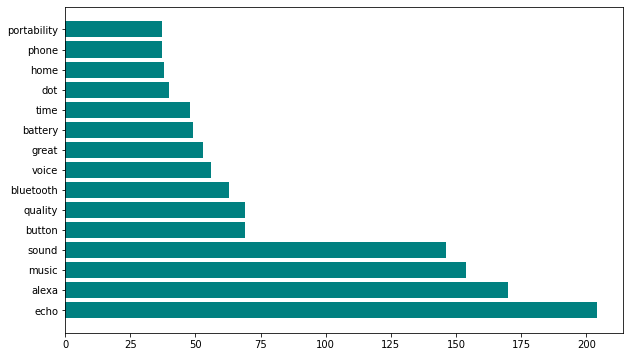

In [43]:
plt.figure(figsize=[10,6])
plt.barh(list(res.keys()), list(res.values()), color="teal")
plt.show()